In [1]:
from keras.datasets  import mnist

2023-09-25 13:38:19.211681: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(train_feature, train_lable), (test_feature , test_label) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
print (len(train_feature),len(train_lable))

60000 60000


In [5]:
print (train_feature.shape,train_lable.shape)

(60000, 28, 28) (60000,)


In [6]:
import matplotlib.pyplot as plt

def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image,cmap='binary')
    plt.show()

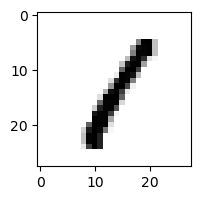

1


In [10]:
show_image(train_feature[3])
print(train_lable[3])

In [11]:
###feature preprocess###################

train_feature_vector = train_feature.reshape(len(train_feature),784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),784).astype('float32')


In [12]:
print (train_feature_vector.shape,test_feature_vector.shape)

(60000, 784) (10000, 784)


In [13]:
####normalize#############

train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

In [21]:
####label preprocess #########

print (train_lable[0:5])

#from keras.utils import np_utils
from tensorflow.python.keras.utils.np_utils import to_categorical

train_lable_onehot = to_categorical(train_lable)
test_lable_onehot = to_categorical(test_label)
print (train_lable_onehot)

[5 0 4 1 9]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [23]:
#### create sequential model ####

from keras.models import Sequential
from keras.layers import Dense


model = Sequential()

### create input layer and hidden layer#########

model.add(Dense (units= 256, input_dim=784,kernel_initializer='normal',activation= 'relu'))

### create output layer ###############

model.add(Dense (units = 10 , kernel_initializer='normal', activation= 'softmax'))

In [25]:
### training model #####################

model.compile (loss= 'categorical_crossentropy', optimizer= 'adam',metrics=['accuracy'])

train_history = model.fit(x=train_feature_normalize,y=train_lable_onehot,validation_split=0.2,epochs=10,batch_size=200,verbose=2) 

Epoch 1/10
240/240 - 3s - loss: 0.4325 - accuracy: 0.8844 - val_loss: 0.2195 - val_accuracy: 0.9399 - 3s/epoch - 12ms/step
Epoch 2/10
240/240 - 1s - loss: 0.1928 - accuracy: 0.9450 - val_loss: 0.1552 - val_accuracy: 0.9555 - 1s/epoch - 6ms/step
Epoch 3/10
240/240 - 1s - loss: 0.1343 - accuracy: 0.9617 - val_loss: 0.1270 - val_accuracy: 0.9639 - 1s/epoch - 6ms/step
Epoch 4/10
240/240 - 2s - loss: 0.1024 - accuracy: 0.9709 - val_loss: 0.1100 - val_accuracy: 0.9666 - 2s/epoch - 7ms/step
Epoch 5/10
240/240 - 2s - loss: 0.0814 - accuracy: 0.9767 - val_loss: 0.1026 - val_accuracy: 0.9706 - 2s/epoch - 8ms/step
Epoch 6/10
240/240 - 2s - loss: 0.0654 - accuracy: 0.9822 - val_loss: 0.0940 - val_accuracy: 0.9732 - 2s/epoch - 7ms/step
Epoch 7/10
240/240 - 2s - loss: 0.0544 - accuracy: 0.9852 - val_loss: 0.0909 - val_accuracy: 0.9720 - 2s/epoch - 9ms/step
Epoch 8/10
240/240 - 1s - loss: 0.0446 - accuracy: 0.9878 - val_loss: 0.0880 - val_accuracy: 0.9735 - 1s/epoch - 6ms/step
Epoch 9/10
240/240 - 1s

In [26]:
### accuracy check #####

scores = model.evaluate(test_feature_normalize,test_lable_onehot)

print ('\準確率 = ',scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9774
\準確率 =  0.977400004863739


In [32]:
import numpy as np
#prediction = model.predict_classes(test_feature_normalize)\
prediction = np.argmax(model.predict(test_feature_normalize),axis=1)

313/313 [==============================] - 2s 5ms/step


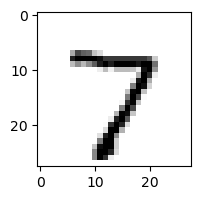

7 7


In [33]:
show_image(test_feature[0])
print (test_label[0],prediction[0])

In [34]:
model.save('Minist_mlp_model.h5')

/Users/ojy/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
